In [90]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()  # for plot styling
import numpy as np
import pandas as pd
from matplotlib import offsetbox
from sklearn import manifold, datasets, decomposition, discriminant_analysis
from sklearn.cluster import KMeans
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
import seaborn as sns
from sklearn import metrics
from scipy.spatial.distance import cdist
import pylab as pl
from sklearn.decomposition import PCA, FastICA
from sklearn import random_projection
from sklearn.metrics import silhouette_score
from sklearn.datasets import load_iris
from sklearn.mixture import GMM
from matplotlib.patches import Ellipse
from sklearn.random_projection import johnson_lindenstrauss_min_dim
from sklearn.random_projection import SparseRandomProjection
from sklearn import datasets, cluster
import matplotlib.cm as cm
import plotly
from plotly.offline import init_notebook_mode
import plotly.graph_objs as go
plotly.offline.init_notebook_mode(connected=True)
import plotly.plotly as py
from plotly.graph_objs import *
import plotly.tools as tls
from scipy import stats
from sklearn.svm import LinearSVC
from sklearn.cross_validation import train_test_split
from sklearn import metrics
from sklearn import datasets
from sklearn.decomposition import FactorAnalysis
from sklearn.model_selection import cross_val_score

In [105]:
MY_FILE = 'iris.csv'
df = pd.read_csv(MY_FILE)

['sepal_length' 'sepal_width' 'petal_length' 'petal_width' 'speices']
   sepal_length  sepal_width  petal_length  petal_width      speices
0           5.1          3.5           1.4          0.2  Iris-setosa
1           4.9          3.0           1.4          0.2  Iris-setosa
2           4.7          3.2           1.3          0.2  Iris-setosa
3           4.6          3.1           1.5          0.2  Iris-setosa
4           5.0          3.6           1.4          0.2  Iris-setosa
5           5.4          3.9           1.7          0.4  Iris-setosa
6           4.6          3.4           1.4          0.3  Iris-setosa
7           5.0          3.4           1.5          0.2  Iris-setosa
8           4.4          2.9           1.4          0.2  Iris-setosa
9           4.9          3.1           1.5          0.1  Iris-setosa
(150, 5)


In [110]:
speices = {'Iris-setosa': 1,'Iris-versicolor': 2, 'Iris-virginica' :3 } 
df.speices = [speices[item] for item in df.speices] 

In [111]:
print(df.columns.values)
print(df.head(10))
print(df.shape)

['sepal_length' 'sepal_width' 'petal_length' 'petal_width' 'speices']
   sepal_length  sepal_width  petal_length  petal_width  speices
0           5.1          3.5           1.4          0.2        1
1           4.9          3.0           1.4          0.2        1
2           4.7          3.2           1.3          0.2        1
3           4.6          3.1           1.5          0.2        1
4           5.0          3.6           1.4          0.2        1
5           5.4          3.9           1.7          0.4        1
6           4.6          3.4           1.4          0.3        1
7           5.0          3.4           1.5          0.2        1
8           4.4          2.9           1.4          0.2        1
9           4.9          3.1           1.5          0.1        1
(150, 5)


In [112]:
#Backup originals
Orig_X = X = np.array(df).astype(float)
Orig_df = df

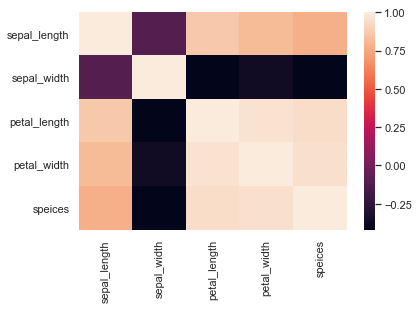

In [113]:
#checking correlation
corr = df.corr()
sns.heatmap(corr, 
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values)

In [114]:
#Getiting attributes and labels seprately
X = np.array(df.drop(['speices'], 1).astype(float))
y = np.array(df['speices'])

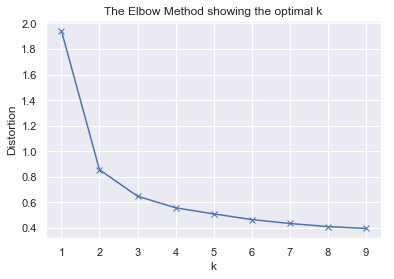

In [115]:
# Determine cluster using elbow
distortions = []
K = range(1,10)
for k in K:
    kmeanModel = KMeans(n_clusters=k, max_iter=1000).fit(X)
    #kmeanModel.fit(X)
    distortions.append(sum(np.min(cdist(X, kmeanModel.cluster_centers_, 'euclidean'), axis=1)) / X.shape[0])
plt.plot(K, distortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('The Elbow Method showing the optimal k')
plt.show()

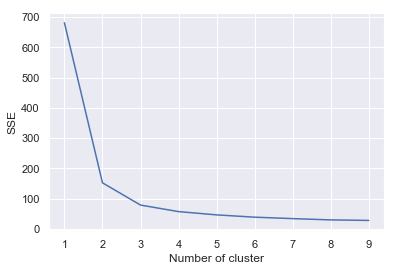

In [116]:
#Determine Cluster using SSE
sse = {}
for k in range(1, 10):
    kmeans = KMeans(n_clusters=k, max_iter=1000).fit(X)
    #X["clusters"] = kmeans.labels_
    #print(data["clusters"])
    sse[k] = kmeans.inertia_ # Inertia: Sum of distances of samples to their closest cluster center
plt.figure()
plt.plot(list(sse.keys()), list(sse.values()))
plt.xlabel("Number of cluster")
plt.ylabel("SSE")
plt.show()

For n_clusters=2, The Silhouette Coefficient is {2: 0.6808136202936816}
For n_clusters=3, The Silhouette Coefficient is {2: 0.6808136202936816, 3: 0.5525919445499757}
For n_clusters=4, The Silhouette Coefficient is {2: 0.6808136202936816, 3: 0.5525919445499757, 4: 0.4978256901095472}
For n_clusters=5, The Silhouette Coefficient is {2: 0.6808136202936816, 3: 0.5525919445499757, 4: 0.4978256901095472, 5: 0.4885175508886279}
For n_clusters=6, The Silhouette Coefficient is {2: 0.6808136202936816, 3: 0.5525919445499757, 4: 0.4978256901095472, 5: 0.4885175508886279, 6: 0.36650401502359653}
For n_clusters=7, The Silhouette Coefficient is {2: 0.6808136202936816, 3: 0.5525919445499757, 4: 0.4978256901095472, 5: 0.4885175508886279, 6: 0.36650401502359653, 7: 0.3508759606304935}
For n_clusters=8, The Silhouette Coefficient is {2: 0.6808136202936816, 3: 0.5525919445499757, 4: 0.4978256901095472, 5: 0.4885175508886279, 6: 0.36650401502359653, 7: 0.3508759606304935, 8: 0.3534347983982664}
For n_clus

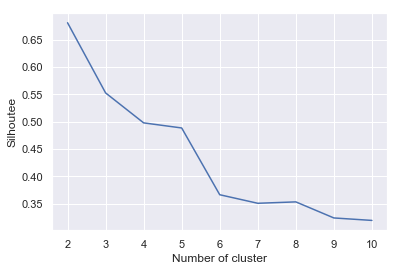

In [117]:
#Determine cluster using Silhouette
sil_coeff = {}
for n_cluster in range(2, 11):
    kmeans = KMeans(n_clusters=n_cluster).fit(X)
    label = kmeans.labels_
    sil_coeff[n_cluster] = silhouette_score(X, label, metric='euclidean')
    print("For n_clusters={}, The Silhouette Coefficient is {}".format(n_cluster, sil_coeff))
plt.figure()
plt.plot(list(sil_coeff.keys()), list(sil_coeff.values()))
plt.xlabel("Number of cluster")
plt.ylabel("Silhoutee")
plt.show()

In [118]:
#Plot KMeans
def plot_kmeans(kmeans, X, n_clusters=4, rseed=0, ax=None):
    labels = kmeans.fit_predict(X)

    # plot the input data
    ax = ax or plt.gca()
    ax.axis('equal')
    ax.scatter(X[:, 0], X[:, 1], c=labels, s=40, cmap='viridis', zorder=2)

    # plot the representation of the KMeans model
    centers = kmeans.cluster_centers_
    radii = [cdist(X[labels == i], [center]).max()
             for i, center in enumerate(centers)]
    for c, r in zip(centers, radii):
        ax.add_patch(plt.Circle(c, r, fc='#CCCCCC', lw=3, alpha=0.5, zorder=1))

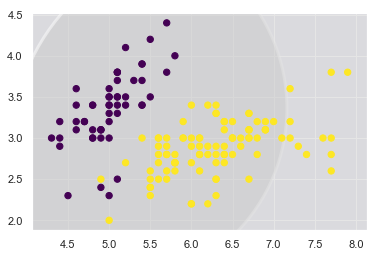

In [119]:
#Based on above analysis, choosing cluster as 3 for KMeans
kmeans = KMeans(n_clusters=2, random_state=0)
plot_kmeans(kmeans, X)
#plt.scatter(X[:,0],X[:,1], c=kmeans.labels_, cmap='rainbow') 
#plt.scatter(centroids[:, 0], centroids[:, 1], marker='*', c='#050505', s=100)

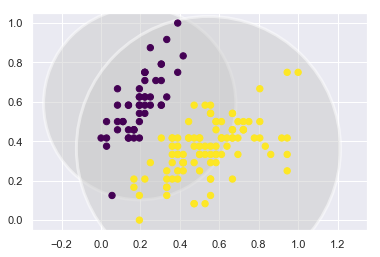

In [120]:
#KMeans after standardizing data using minmax scaler
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)
plot_kmeans(kmeans, X_scaled)

In [121]:
#Draw ellipses
def draw_ellipse(position, covariance, ax=None, **kwargs):
    """Draw an ellipse with a given position and covariance"""
    ax = ax or plt.gca()
    
    # Convert covariance to principal axes
    if covariance.shape == (2, 2):
        U, s, Vt = np.linalg.svd(covariance)
        angle = np.degrees(np.arctan2(U[1, 0], U[0, 0]))
        width, height = 2 * np.sqrt(s)
    else:
        angle = 0
        width, height = 2 * np.sqrt(covariance)
    
    # Draw the Ellipse
    for nsig in range(1, 4):
        ax.add_patch(Ellipse(position, nsig * width, nsig * height,
                             angle, **kwargs))

In [122]:
#Plot GMM
def plot_gmm(gmm, X, label=True, ax=None):
    ax = ax or plt.gca()
    labels = gmm.fit(X).predict(X)
    print(labels)
    if label:
        ax.scatter(X[:, 0], X[:, 1], c=labels, s=40, cmap='viridis', zorder=2)
    else:
        ax.scatter(X[:, 0], X[:, 1], s=40, zorder=2)
    ax.axis('equal')
    
    w_factor = 0.2 / gmm.weights_.max()
    for pos, covar, w in zip(gmm.means_, gmm.covars_, gmm.weights_):
        draw_ellipse(pos, covar, alpha=w * w_factor)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:58: DeprecationWarning:

Class GMM is deprecated; The class GMM is deprecated in 0.18 and will be  removed in 0.20. Use class GaussianMixture instead.

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:77: DeprecationWarning:

Function distribute_covar_matrix_to_match_covariance_type is deprecated; The function distribute_covar_matrix_to_match_covariance_typeis deprecated in 0.18 and will be removed in 0.20.

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:77: DeprecationWarning:

Function log_multivariate_normal_density is deprecated; The function log_multivariate_normal_density is deprecated in 0.18 and will be removed in 0.20.

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:77: DeprecationWarning:

Function log_multivariate_normal_density is deprecated; The function log_multivariate_normal_density is deprecated in 0.18 and will be removed in 

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:77: DeprecationWarning:

Function log_multivariate_normal_density is deprecated; The function log_multivariate_normal_density is deprecated in 0.18 and will be removed in 0.20.

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:77: DeprecationWarning:

Function log_multivariate_normal_density is deprecated; The function log_multivariate_normal_density is deprecated in 0.18 and will be removed in 0.20.

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:77: DeprecationWarning:

Function log_multivariate_normal_density is deprecated; The function log_multivariate_normal_density is deprecated in 0.18 and will be removed in 0.20.

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:77: DeprecationWarning:

Function log_multivariate_normal_density is deprecated; The function log_multivariate_normal_density is deprecated in 0.18 and will be removed in 0.20.



C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:77: DeprecationWarning:

Function log_multivariate_normal_density is deprecated; The function log_multivariate_normal_density is deprecated in 0.18 and will be removed in 0.20.

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:77: DeprecationWarning:

Function log_multivariate_normal_density is deprecated; The function log_multivariate_normal_density is deprecated in 0.18 and will be removed in 0.20.

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:77: DeprecationWarning:

Function log_multivariate_normal_density is deprecated; The function log_multivariate_normal_density is deprecated in 0.18 and will be removed in 0.20.

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:77: DeprecationWarning:

Function log_multivariate_normal_density is deprecated; The function log_multivariate_normal_density is deprecated in 0.18 and will be removed in 0.20.



C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:77: DeprecationWarning:

Function distribute_covar_matrix_to_match_covariance_type is deprecated; The function distribute_covar_matrix_to_match_covariance_typeis deprecated in 0.18 and will be removed in 0.20.

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:77: DeprecationWarning:

Function log_multivariate_normal_density is deprecated; The function log_multivariate_normal_density is deprecated in 0.18 and will be removed in 0.20.

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:77: DeprecationWarning:

Function log_multivariate_normal_density is deprecated; The function log_multivariate_normal_density is deprecated in 0.18 and will be removed in 0.20.

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:77: DeprecationWarning:

Function log_multivariate_normal_density is deprecated; The function log_multivariate_normal_density is deprecated in 0.

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:77: DeprecationWarning:

Function log_multivariate_normal_density is deprecated; The function log_multivariate_normal_density is deprecated in 0.18 and will be removed in 0.20.

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:77: DeprecationWarning:

Function log_multivariate_normal_density is deprecated; The function log_multivariate_normal_density is deprecated in 0.18 and will be removed in 0.20.

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:77: DeprecationWarning:

Function log_multivariate_normal_density is deprecated; The function log_multivariate_normal_density is deprecated in 0.18 and will be removed in 0.20.

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:77: DeprecationWarning:

Function log_multivariate_normal_density is deprecated; The function log_multivariate_normal_density is deprecated in 0.18 and will be removed in 0.20.



C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:77: DeprecationWarning:

Function distribute_covar_matrix_to_match_covariance_type is deprecated; The function distribute_covar_matrix_to_match_covariance_typeis deprecated in 0.18 and will be removed in 0.20.

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:77: DeprecationWarning:

Function log_multivariate_normal_density is deprecated; The function log_multivariate_normal_density is deprecated in 0.18 and will be removed in 0.20.

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:77: DeprecationWarning:

Function log_multivariate_normal_density is deprecated; The function log_multivariate_normal_density is deprecated in 0.18 and will be removed in 0.20.

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:77: DeprecationWarning:

Function log_multivariate_normal_density is deprecated; The function log_multivariate_normal_density is deprecated in 0.

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:77: DeprecationWarning:

Function log_multivariate_normal_density is deprecated; The function log_multivariate_normal_density is deprecated in 0.18 and will be removed in 0.20.

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:77: DeprecationWarning:

Function log_multivariate_normal_density is deprecated; The function log_multivariate_normal_density is deprecated in 0.18 and will be removed in 0.20.

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:77: DeprecationWarning:

Function log_multivariate_normal_density is deprecated; The function log_multivariate_normal_density is deprecated in 0.18 and will be removed in 0.20.

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:77: DeprecationWarning:

Function log_multivariate_normal_density is deprecated; The function log_multivariate_normal_density is deprecated in 0.18 and will be removed in 0.20.



C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:77: DeprecationWarning:

Function log_multivariate_normal_density is deprecated; The function log_multivariate_normal_density is deprecated in 0.18 and will be removed in 0.20.

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:77: DeprecationWarning:

Function log_multivariate_normal_density is deprecated; The function log_multivariate_normal_density is deprecated in 0.18 and will be removed in 0.20.

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:77: DeprecationWarning:

Function log_multivariate_normal_density is deprecated; The function log_multivariate_normal_density is deprecated in 0.18 and will be removed in 0.20.

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:77: DeprecationWarning:

Function log_multivariate_normal_density is deprecated; The function log_multivariate_normal_density is deprecated in 0.18 and will be removed in 0.20.



C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:77: DeprecationWarning:

Function log_multivariate_normal_density is deprecated; The function log_multivariate_normal_density is deprecated in 0.18 and will be removed in 0.20.

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:77: DeprecationWarning:

Function log_multivariate_normal_density is deprecated; The function log_multivariate_normal_density is deprecated in 0.18 and will be removed in 0.20.

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:77: DeprecationWarning:

Function log_multivariate_normal_density is deprecated; The function log_multivariate_normal_density is deprecated in 0.18 and will be removed in 0.20.

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:77: DeprecationWarning:

Function log_multivariate_normal_density is deprecated; The function log_multivariate_normal_density is deprecated in 0.18 and will be removed in 0.20.



C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:77: DeprecationWarning:

Function log_multivariate_normal_density is deprecated; The function log_multivariate_normal_density is deprecated in 0.18 and will be removed in 0.20.

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:77: DeprecationWarning:

Function log_multivariate_normal_density is deprecated; The function log_multivariate_normal_density is deprecated in 0.18 and will be removed in 0.20.

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:77: DeprecationWarning:

Function log_multivariate_normal_density is deprecated; The function log_multivariate_normal_density is deprecated in 0.18 and will be removed in 0.20.

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:58: DeprecationWarning:

Class GMM is deprecated; The class GMM is deprecated in 0.18 and will be  removed in 0.20. Use class GaussianMixture instead.

C:\ProgramData\Anaconda3\l

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:77: DeprecationWarning:

Function log_multivariate_normal_density is deprecated; The function log_multivariate_normal_density is deprecated in 0.18 and will be removed in 0.20.

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:77: DeprecationWarning:

Function log_multivariate_normal_density is deprecated; The function log_multivariate_normal_density is deprecated in 0.18 and will be removed in 0.20.

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:77: DeprecationWarning:

Function log_multivariate_normal_density is deprecated; The function log_multivariate_normal_density is deprecated in 0.18 and will be removed in 0.20.

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:77: DeprecationWarning:

Function log_multivariate_normal_density is deprecated; The function log_multivariate_normal_density is deprecated in 0.18 and will be removed in 0.20.



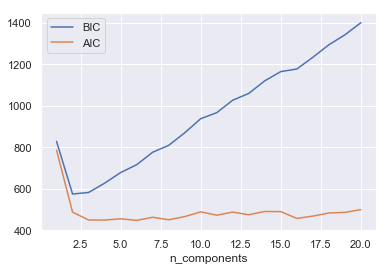

In [123]:
#Expectation Maximization
n_components = np.arange(1, 21)
models = [GMM(n, covariance_type='full', random_state=0).fit(X)
          for n in n_components]

plt.plot(n_components, [m.bic(X) for m in models], label='BIC')
plt.plot(n_components, [m.aic(X) for m in models], label='AIC')
plt.legend(loc='best')
plt.xlabel('n_components');

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:58: DeprecationWarning:

Class GMM is deprecated; The class GMM is deprecated in 0.18 and will be  removed in 0.20. Use class GaussianMixture instead.

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:77: DeprecationWarning:

Function distribute_covar_matrix_to_match_covariance_type is deprecated; The function distribute_covar_matrix_to_match_covariance_typeis deprecated in 0.18 and will be removed in 0.20.

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:77: DeprecationWarning:

Function log_multivariate_normal_density is deprecated; The function log_multivariate_normal_density is deprecated in 0.18 and will be removed in 0.20.

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:77: DeprecationWarning:

Function log_multivariate_normal_density is deprecated; The function log_multivariate_normal_density is deprecated in 0.18 and will be removed in 

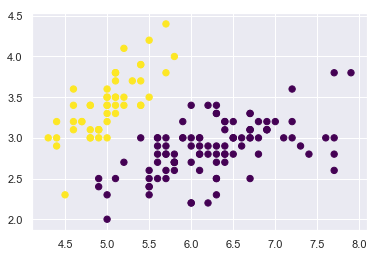

In [124]:
#Based on EM - GMM, choosing component 5 (Before Scaling)
gmm = GMM(n_components=2, covariance_type='full', random_state=42).fit(X)
#plot_gmm(gmm, X)
labels = gmm.predict(X)
plt.scatter(X[:, 0], X[:, 1], c=labels, s=40, cmap='viridis');

In [125]:
# Dimension reduction - PCA
pca = PCA()
X_pca = pca.fit_transform(X)

In [126]:
pca_df = pd.DataFrame(X_pca,columns=['PC1','PC2','PC3','PC4'])
df = pd.merge(df, pca_df, right_index=True, left_index=True)

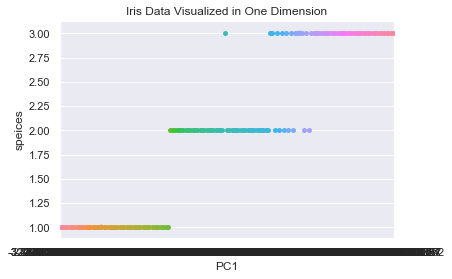

In [129]:
sns.stripplot(x="PC1", y="speices", data=df,jitter=True)
plt.title('Iris Data Visualized in One Dimension');

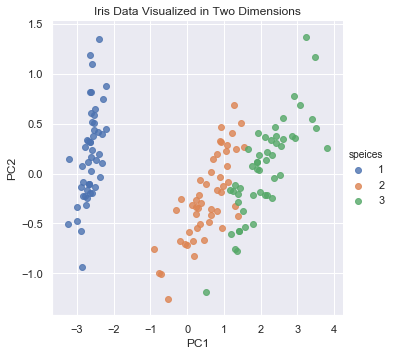

In [131]:
sns.lmplot('PC1','PC2',data=df,hue='speices',fit_reg=False)
plt.title('Iris Data Visualized in Two Dimensions');

In [132]:
X_std = X_scaled 
mean_vec = np.mean(X_std, axis=0)
cov_mat = (X_std - mean_vec).T.dot((X_std - mean_vec)) / (X_std.shape[0]-1)
print('Covariance matrix \n%s' %cov_mat)

Covariance matrix 
[[ 0.05290845 -0.00454496  0.05996621  0.05982683]
 [-0.00454496  0.03263959 -0.02271983 -0.02048285]
 [ 0.05996621 -0.02271983  0.08943348  0.09155279]
 [ 0.05982683 -0.02048285  0.09155279  0.1011136 ]]


In [133]:
cov_mat = np.cov(X_std.T)
eig_vals, eig_vecs = np.linalg.eig(cov_mat)

print('Eigenvectors \n%s' %eig_vecs)
print('\nEigenvalues \n%s' %eig_vals)

Eigenvectors 
[[ 0.4252893  -0.42100611 -0.71434339  0.36276216]
 [-0.14612219 -0.90470509  0.33510219 -0.21877734]
 [ 0.61610511  0.06432645 -0.06825927 -0.78205964]
 [ 0.64667752  0.01116485  0.61054133  0.45708076]]

Eigenvalues 
[0.23231168 0.03239279 0.00963728 0.00175337]


In [134]:
cor_mat1 = np.corrcoef(X_std.T)
eig_vals, eig_vecs = np.linalg.eig(cor_mat1)
print('Eigenvectors \n%s' %eig_vecs)
print('\nEigenvalues \n%s' %eig_vals)

Eigenvectors 
[[ 0.52237162 -0.37231836 -0.72101681  0.26199559]
 [-0.26335492 -0.92555649  0.24203288 -0.12413481]
 [ 0.58125401 -0.02109478  0.14089226 -0.80115427]
 [ 0.56561105 -0.06541577  0.6338014   0.52354627]]

Eigenvalues 
[2.91081808 0.92122093 0.14735328 0.02060771]


In [135]:
cor_mat2 = np.corrcoef(X.T)
eig_vals, eig_vecs = np.linalg.eig(cor_mat2)
print('Eigenvectors \n%s' %eig_vecs)
print('\nEigenvalues \n%s' %eig_vals)

Eigenvectors 
[[ 0.52237162 -0.37231836 -0.72101681  0.26199559]
 [-0.26335492 -0.92555649  0.24203288 -0.12413481]
 [ 0.58125401 -0.02109478  0.14089226 -0.80115427]
 [ 0.56561105 -0.06541577  0.6338014   0.52354627]]

Eigenvalues 
[2.91081808 0.92122093 0.14735328 0.02060771]


In [136]:
for ev in eig_vecs:
    np.testing.assert_array_almost_equal(1.0, np.linalg.norm(ev))
print('Everything ok!')

Everything ok!


In [137]:
# Make a list of (eigenvalue, eigenvector) tuples
eig_pairs = [(np.abs(eig_vals[i]), eig_vecs[:,i]) for i in range(len(eig_vals))]

# Sort the (eigenvalue, eigenvector) tuples from high to low
eig_pairs.sort()
eig_pairs.reverse()

# Visually confirm that the list is correctly sorted by decreasing eigenvalues
print('Eigenvalues in descending order:')
for i in eig_pairs:
    print(i[0])

Eigenvalues in descending order:
2.910818083752054
0.9212209307072242
0.14735327830509573
0.020607707235625678


In [138]:
tot = sum(eig_vals)
var_exp = [(i / tot)*100 for i in sorted(eig_vals, reverse=True)]
cum_var_exp = np.cumsum(var_exp)

trace1 = Bar(
        x=['PC %s' %i for i in range(1,5)],
        y=var_exp,
        showlegend=False)

trace2 = Scatter(
        x=['PC %s' %i for i in range(1,5)], 
        y=cum_var_exp,
        name='cumulative explained variance')

data_1 = Data([trace1, trace2])

layout=Layout(
        yaxis=YAxis(title='Explained variance in percent'),
        title='Explained variance by different principal components')

C:\ProgramData\Anaconda3\lib\site-packages\plotly\graph_objs\_deprecations.py:39: DeprecationWarning:

plotly.graph_objs.Data is deprecated.
Please replace it with a list or tuple of instances of the following types
  - plotly.graph_objs.Scatter
  - plotly.graph_objs.Bar
  - plotly.graph_objs.Area
  - plotly.graph_objs.Histogram
  - etc.


C:\ProgramData\Anaconda3\lib\site-packages\plotly\graph_objs\_deprecations.py:558: DeprecationWarning:

plotly.graph_objs.YAxis is deprecated.
Please replace it with one of the following more specific types
  - plotly.graph_objs.layout.YAxis
  - plotly.graph_objs.layout.scene.YAxis




In [139]:
 choromap = go.Figure(data = data_1,layout = layout)

plotly.offline.plot(choromap)

'file://C:\\Users\\radhakvx\\cs7641\\turnover\\temp-plot.html'

Text(0.5,1,'Component-wise and Cumulative Explained Variance')

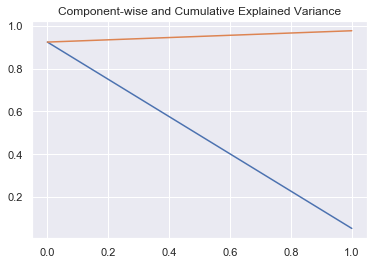

In [141]:
pca = PCA(n_components=2)
pca_result = pca.fit_transform(X)
plt.plot(range(2), pca.explained_variance_ratio_)
plt.plot(range(2), np.cumsum(pca.explained_variance_ratio_))
plt.title("Component-wise and Cumulative Explained Variance")

In [142]:
#ica = FastICA(random_state=rng)
ica = FastICA()
S_ica_ = ica.fit(X).transform(X)  # Estimate the sources

In [143]:
kurtosis_val = stats.kurtosis(S_ica_)
np.argmax(kurtosis_val)

0

In [144]:
n_components = np.int32(np.linspace(2, 10, 9))
n_components

array([ 2,  3,  4,  5,  6,  7,  8,  9, 10])

In [145]:
    from scipy import stats
    ica = FastICA()
    S_ica_ = ica.fit(X).transform(X) 
    ica_kurt_scores = []
    for n in n_components:
        #pca.n_components = n
        ica.n_components = n
        S_ica_ = ica.fit(X).transform(X) 
        #pca_scores.append(np.mean(cross_val_score(pca, X)))
        print()
        ica_kurt_scores.append(np.argmax(stats.kurtosis(S_ica_)))
    print(ica_kurt_scores)










[1, 2, 1, 0, 1, 0, 3, 1, 3]


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\decomposition\fastica_.py:118: UserWarning:

FastICA did not converge. Consider increasing tolerance or the maximum number of iterations.

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\decomposition\fastica_.py:301: UserWarning:

n_components is too large: it will be set to 4

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\decomposition\fastica_.py:301: UserWarning:

n_components is too large: it will be set to 4

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\decomposition\fastica_.py:301: UserWarning:

n_components is too large: it will be set to 4

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\decomposition\fastica_.py:301: UserWarning:

n_components is too large: it will be set to 4

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\decomposition\fastica_.py:301: UserWarning:

n_components is too large: it will be set to 4

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\decomposition\fastica_.py:301: UserWarn

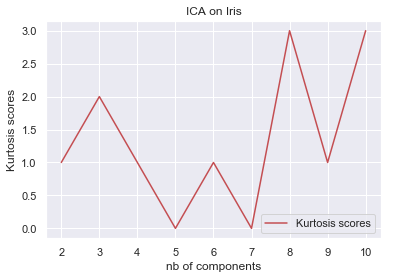

In [147]:
plt.figure()
plt.plot(n_components, ica_kurt_scores, 'r', label='Kurtosis scores')
plt.xlabel('nb of components')
plt.ylabel('Kurtosis scores')
plt.legend(loc='lower right')
plt.title("ICA on Iris")
plt.show()

In [148]:
accuracies = []
components = np.int32(np.linspace(1, 3, 3))
components

array([1, 2, 3])

In [149]:
data = df.drop(['speices'], 1)
target = df['speices']

In [150]:
split = train_test_split(data, target, test_size = 0.3,
    random_state = 42)
(trainData, testData, trainTarget, testTarget) = split

In [151]:
model = LinearSVC()
model.fit(trainData, trainTarget)
baseline = metrics.accuracy_score(model.predict(testData), testTarget)

In [152]:
#loop over the projection sizes
for comp in components:
    # create the random projection
    sp = SparseRandomProjection(n_components = comp)
    X = sp.fit_transform(trainData)
 
    # train a classifier on the sparse random projection
    model = LinearSVC()
    model.fit(X, trainTarget)
 
    # evaluate the model and update the list of accuracies
    test = sp.transform(testData)
    accuracies.append(metrics.accuracy_score(model.predict(test), testTarget))

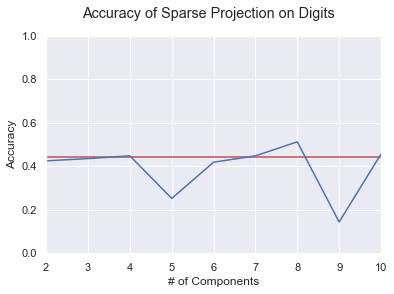

In [86]:
# create the figure
plt.figure()
plt.suptitle("Accuracy of Sparse Projection on Digits")
plt.xlabel("# of Components")
plt.ylabel("Accuracy")
plt.xlim([2, 10])
plt.ylim([0, 1.0])
 
# plot the baseline and random projection accuracies
plt.plot(components, [baseline] * len(accuracies), color = "r")
plt.plot(components, accuracies)

plt.show()

In [153]:
FA = FactorAnalysis(n_components = 2).fit_transform(trainData)

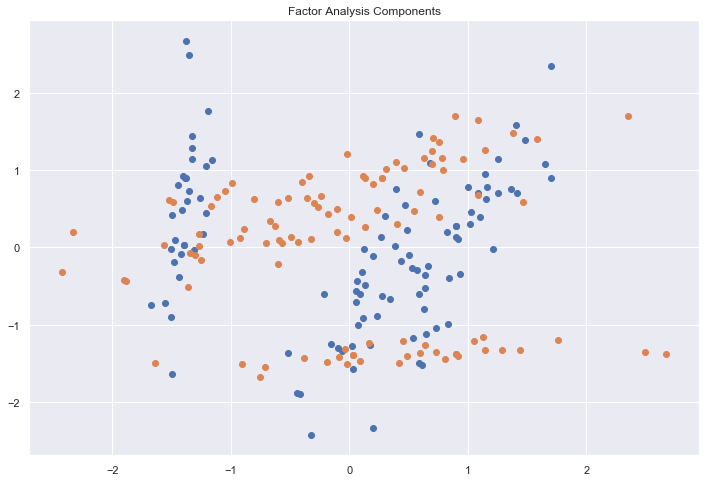

In [154]:
plt.figure(figsize=(12,8))
plt.title('Factor Analysis Components')
plt.scatter(FA[:,0], FA[:,1])
plt.scatter(FA[:,1], FA[:,0])


In [155]:
    fa = FactorAnalysis()

    pca_scores, fa_scores = [], []
    for n in n_components:
        #pca.n_components = n
        fa.n_components = n
        #pca_scores.append(np.mean(cross_val_score(pca, X)))
        fa_scores.append(np.mean(cross_val_score(fa, X)))


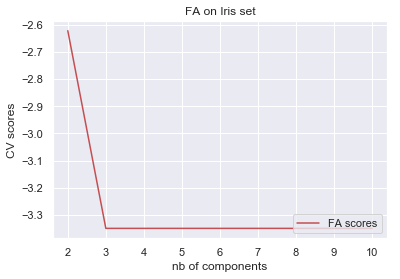

In [156]:
plt.figure()
plt.plot(n_components, fa_scores, 'r', label='FA scores')
plt.xlabel('nb of components')
plt.ylabel('CV scores')
plt.legend(loc='lower right')
plt.title("FA on Iris set")
plt.show()

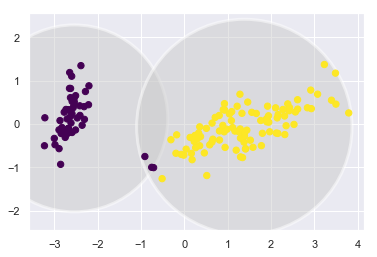

In [157]:
kmeans = KMeans(n_clusters=2, random_state=0)
plot_kmeans(kmeans, X_pca )

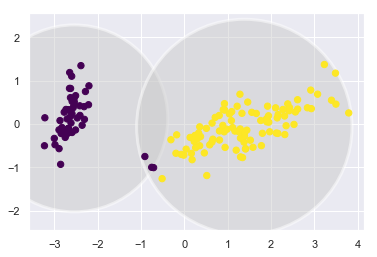

In [158]:
kmeans = KMeans(n_clusters=2, random_state=0)
plot_kmeans(kmeans, X_pca )

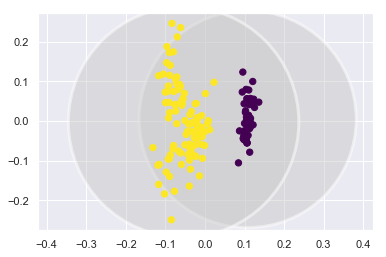

In [159]:
kmeans = KMeans(n_clusters=2, random_state=0)
plot_kmeans(kmeans, S_ica_ )

In [160]:
 sp = SparseRandomProjection(n_components = 2)
 sp_X = sp.fit_transform(trainData)
 

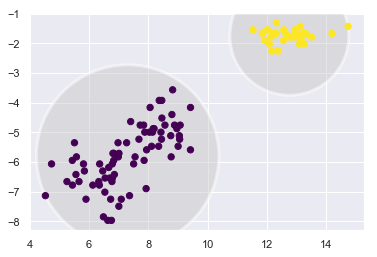

In [162]:
kmeans = KMeans(n_clusters=2, random_state=0)
plot_kmeans(kmeans, sp_X)